# Desision Tree Regressor
https://gdcoder.com/decision-tree-regressor-explained-in-depth/

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Concept of Decision Tree Regression

Imagine we have a dataset which contains three columns such as Salary, Age and Experience.<br>
Let's take Age and Experience as IV(independent var) and Salara as DV.<br>
The scatter plot of IV: <img src='concept1.png'>
Naturally, we need to predict Salary(DV)

Next, decision tree algorithm separates data into different splits.<br>
In the algorithm, Split depends on Information Gain<br>
IG is computed with Entropy or Gini(for Classification) which is explained in Decision Tree Classification<br>
However when it comes to Regression model which has Continuous DV(dependent var), Information Gain is calculated using the Weighted Mean Squared Error (MSE)

The splits:
<img src='concept3.png'>
Where X1 is age and X2 is experiance

First split happens when X1<20. And it is the Root Node which is the most important mode in Tree.<br>
Second split is when Split1 is false and X2<170.<br>
Third split is when Split1 is true and X2<200.<br>
Fourth split is when Split1 is false and Split2 is true and X1<40.<br>
Below are all splits with exact values:
<img src='concept2.png'>

After splitting our decision tree looks like this:
<img src='concept4.png'>
Look back to the explanation of the splits and compare with the Tree

And again, there is an algorithm which splits data using Information Gain

In [0]:
dataset = pd.read_csv('car_pred.csv')
dataset = dataset[:1000] #Select only 1000 of data for the sake of Simplicity
dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Now, Let's do this concept using real data.<br>
Data descirption: Our data describes cars with its features including MSRP(Manufacturer's Suggested Retail Price) which is simply a Price.<br>
We are going to choose Make, Year, engine HP(horse power), highway MPG(miles per gallon) and City MPG as Independent Variables and the Dependent variable is the Price of cars(MSRP)

Data Preprocessing

Let's divide our data into Dependant and Independant variables

In [0]:
#let's choose 4-5 independent variables
X = dataset[['Make', 'Year', 'Engine HP', 'highway MPG', 'city mpg']]
y = dataset['MSRP']

In [0]:
dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Let's check whether which one of columns has NaN(empty) value

In [0]:
X.isnull().any()

Make           False
Year           False
Engine HP       True
highway MPG    False
city mpg       False
dtype: bool

Engine HP has Null or NaN values and we  can replace them with the mean of whole column to avoid baised decision

In [0]:
X['Engine HP'].fillna(X['Engine HP'].mean(), inplace=True)

C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Let's check for Null or NaN values again to make sure

In [0]:
X.isnull().any()

Make           False
Year           False
Engine HP      False
highway MPG    False
city mpg       False
dtype: bool

Since there is no empty values in the data, now we have to convert the Make column into numerical type

Let's convert the column "Make" into numbers. Firstly, Let's see all the brands in the dataset

Checking types of categorical data in Make column with "unique()" function

In [0]:
makes=X['Make'].unique()
makes

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab'], dtype=object)

Creating dictionary for Make column in order to map later.
<br>There will be numbers from 0 to 16 where each number representing a certain Make of the car

In [0]:
makes_dic={i:makes.tolist().index(i) for i in makes}
#Normalization of Make column is done
makes_dic

{'Alfa Romeo': 10,
 'Audi': 1,
 'BMW': 0,
 'Chrysler': 4,
 'FIAT': 2,
 'Ferrari': 9,
 'Maybach': 13,
 'Mazda': 7,
 'McLaren': 12,
 'Mercedes-Benz': 3,
 'Mitsubishi': 8,
 'Nissan': 5,
 'Pontiac': 14,
 'Porsche': 15,
 'Saab': 16,
 'Toyota': 11,
 'Volvo': 6}

Mapping the dictionary to the Independant variable "Make"

In [0]:
X['Make']=X['Make'].map(makes_dic)

C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [0]:
X.head()

,Make,Year,Engine HP,highway MPG,city mpg
0,0,2011,335.0,26,19
1,0,2011,300.0,28,19
2,0,2011,300.0,28,20
3,0,2011,230.0,28,18
4,0,2011,230.0,28,18


Splitting the data into Train and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Creating Decision Tree Regression model

In [0]:
from sklearn.tree import DecisionTreeRegressor
dt_reg_model_1 = DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=1)

Criterion is Mean Squared Error. <br>
Entropy was used as criterion before because it was Classification and we were predicting only two values(Survived or not)<br>
However, in regression we predict Continues datatype and use Mean Squared Error for the measure of disorder(or impurity)

Fitting dataset to the model

In [0]:
dt_reg_model_1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

Visualizing the Decision Tree

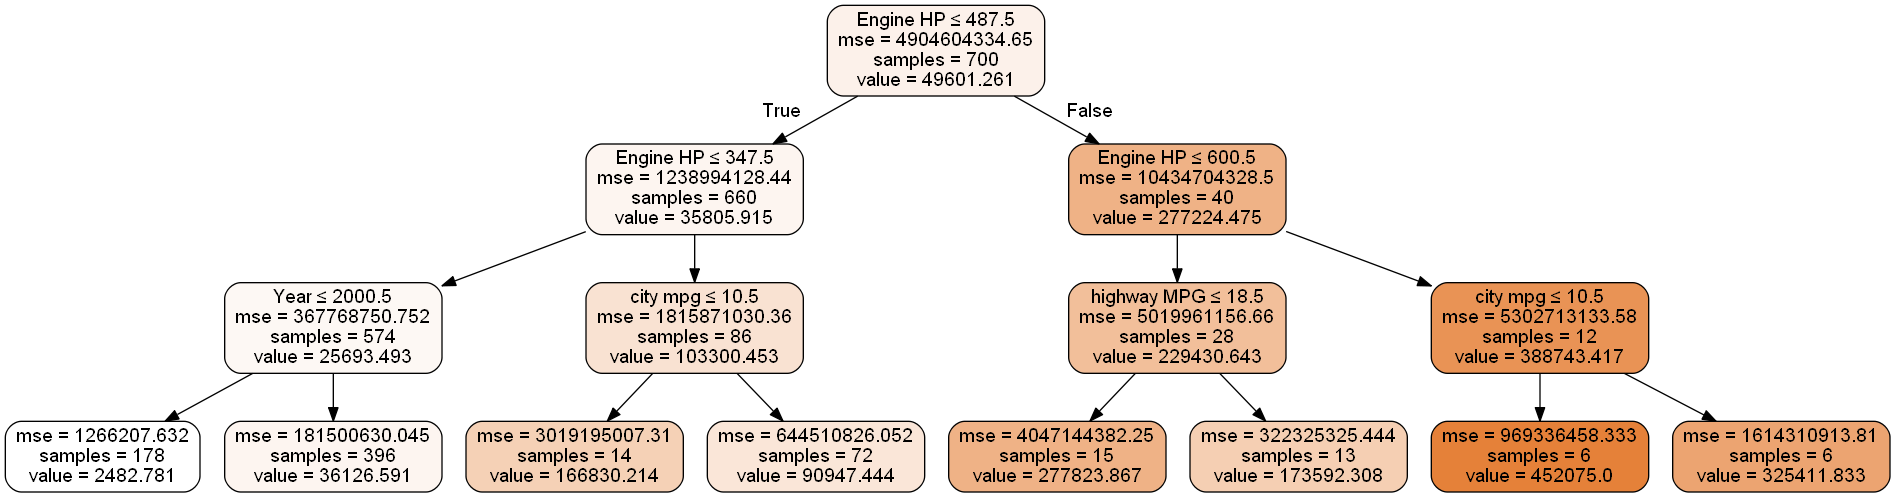

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_reg_model_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Interpretation of above Decision Tree image. (Double click on the image to zoom)<br>
So, Root node is EngineHP with a condition when EngineHP<487.5

MSE is Mean Squared Error which is sum of distances between observed and predicted values<br>
Formula: $\frac{1}{n}\sum_{i=1}^{n} \left ( y{_{o}}-\hat{y{_{p}}} \right )^{2}$ <br>
Samples are number of values before the condition is applied(condition is first)<br>
Value is MEAN of Price(MSPG)

Proving the Decision Tree of Sample numbers based on the condition

In [0]:
condition_1_true = X_train[X_train['Engine HP'] <= 487.5] #When Engine HP is lower than 487.5
condition_1_false = X_train[X_train['Engine HP'] >= 487.5]#When Engine HP is not lower than 487.5

In [0]:
len(condition_1_false) #print out the dataframe to get more insight
len(condition_1_true)

660

In [0]:
condition_2_true = condition_1_true[condition_1_true['Engine HP'] <= 347.5]
#this is when condition1 is true and Engine HP is less than 347.5(means it is between )

condition_2_false = condition_1_true[condition_1_true['Engine HP'] >= 347.5]

In [0]:
len(condition_2_true)
len(condition_2_false)

86

In [0]:
len(condition_2_true)

574

In [0]:
#this is the whole right Leaf of the tree
len(X_train[(X_train['Engine HP'] >600.5 ) & (X_train['city mpg']>10.5 )])

6

Conclusion: Each depth of the tree is a condition which affects next Internal node.<br>
Internal node is the all nodes except Root node which is the topmost(important) node<br>
Leaf nodes are the last nodes which holds numeric prediction(for Regression).<br>
Refer to the picture below for terminologies:
<img width=500, height=300 src='concept5.png'>

Now, Let's get score for Training set

In [0]:
dt_reg_model_1.score(X_train, y_train)

0.92975334814382171

93% is not a bad score for any predictive model, but it was for training set. <br>
Now, let's see the score for the Test set and it is usually a bit lower than score in Training set

In [0]:
dt_reg_model_1.score(X_test, y_test)

0.87601864563780529

Our model is able to predict 87% correctly which is a very good accuracy 

We had Independent variables such as 1)Make 2)Year 3)Engine HP 4)Highway MPG 5)City mpg.
<br>However, if you look at image of Decision Tree, "Make" variable is not even used in the tree.
<br>Therefore, we can eliminate the "Make" variable from model<br>
Now, let's create second model which does not have "Make" Independent variable

In [0]:
#Deleting "Make" from features in Training and Test sets
X_train.drop('Make', axis=1, inplace=True) #choose axis=1 for column, axis=0 for rows
X_test.drop('Make', axis=1, inplace=True)

C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [0]:
#Creating model
dt_reg_model_2=DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=1)
#Fitting new features
dt_reg_model_2.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [0]:
#Checking Training Score
dt_reg_model_2.score(X_train, y_train)

0.92975334814382171

In [0]:
#Checking Test Score
dt_reg_model_2.score(X_test, y_test)

0.87601864563780529

So, we have the same score even though "Make" column was deleted. Now let's try to add more columns to see whether we get a better model

In [0]:
dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [0]:
labels_to_drop = ['Make', 'Model', 'Market Category', 'MSRP']
X = dataset.drop(axis=1, labels=labels_to_drop)
#I selected all the columns except 1)Make 2)Model and 3)Market Category
y = dataset['MSRP']

Let's check for missing data

In [0]:
X.isnull().any()

Year                 False
Engine Fuel Type     False
Engine HP             True
Engine Cylinders     False
Transmission Type    False
Driven_Wheels        False
Number of Doors      False
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
dtype: bool

Only Engine HP has empty values, but we are going to normalize it the same way we have done

In [0]:
X['Engine HP'].fillna(X['Engine HP'].mean(), inplace=True)

Check again and make sure there is no missing data

In [0]:
X.isnull().any()

Year                 False
Engine Fuel Type     False
Engine HP            False
Engine Cylinders     False
Transmission Type    False
Driven_Wheels        False
Number of Doors      False
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
dtype: bool

No missing data anymore, and now we have to replace the categorical values with numeric ones
<br>We can do it manually or just use a class in sklearn called "LabelEncoder"

In [0]:
#Manual way:
#1step: Check all types of the column and store it in a list
eng_fuel = X['Engine Fuel Type'].unique()
eng_fuel
#2step: Create a dictionary which has keys as original data and values as numeric
eng_fuel_dic = {k: v for v, k in enumerate(eng_fuel.tolist())}
#3step: Map the dictionary to the dataset
X['Engine Fuel Type'] = X['Engine Fuel Type'].map(eng_fuel_dic)

In [0]:
#With LabelEncoder
#1step: import LabelEncoder from preprocessing
from sklearn.preprocessing import LabelEncoder
#2step create an object of LabelEncoder
labelencoder = LabelEncoder()
#3step fit_transform the column you want
X['Transmission Type'] = labelencoder.fit_transform(X['Transmission Type'])

We need encode other columns such as Driven_Weels, Vehicle size and Vehicle style.<br>
Let's avoid repetitive code and create a loop for that

In [0]:
encode_list = 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'
for i in encode_list:
    X[i] = labelencoder.fit_transform(X[i])
    

Finally, the dataset is read to be fit into model now. But before fitting, we need to split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
#Creating the Decision Tree model and Fitting the Training set
dt_reg_model_3 = DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=1)
dt_reg_model_3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

Let's Visualize the Decision Tree

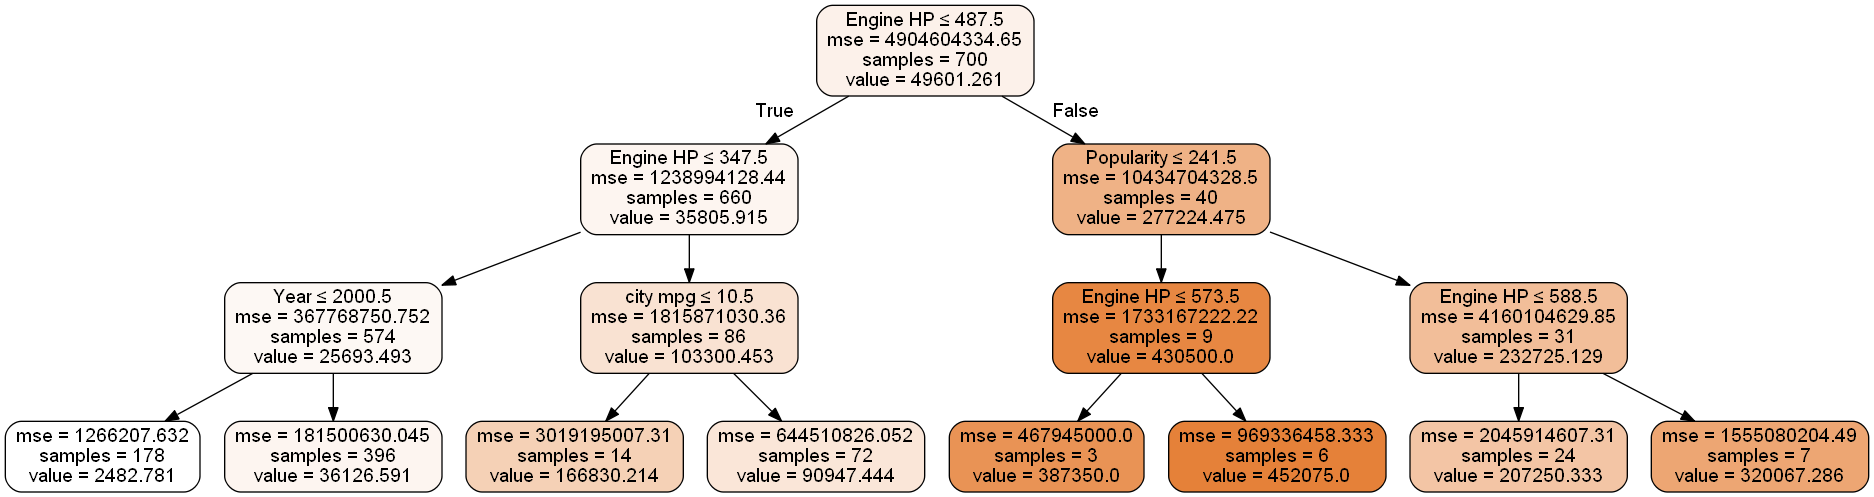

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_reg_model_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

As you can see that Engine HP feature is still the most important because it obviously describes Price the most. Let's get the score of the model now

In [0]:
dt_reg_model_3.score(X_train, y_train)

0.93359577647107184

In [0]:
dt_reg_model_3.score(X_test, y_test)

0.90136625157462369

Wow, 90% accuracy in the Testing score is great, but our model used only some of the features. Let's create another model with max_depth=5(default) and see which features are used

In [0]:
dt_reg_model_4 = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=1)
dt_reg_model_4.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

Visualization

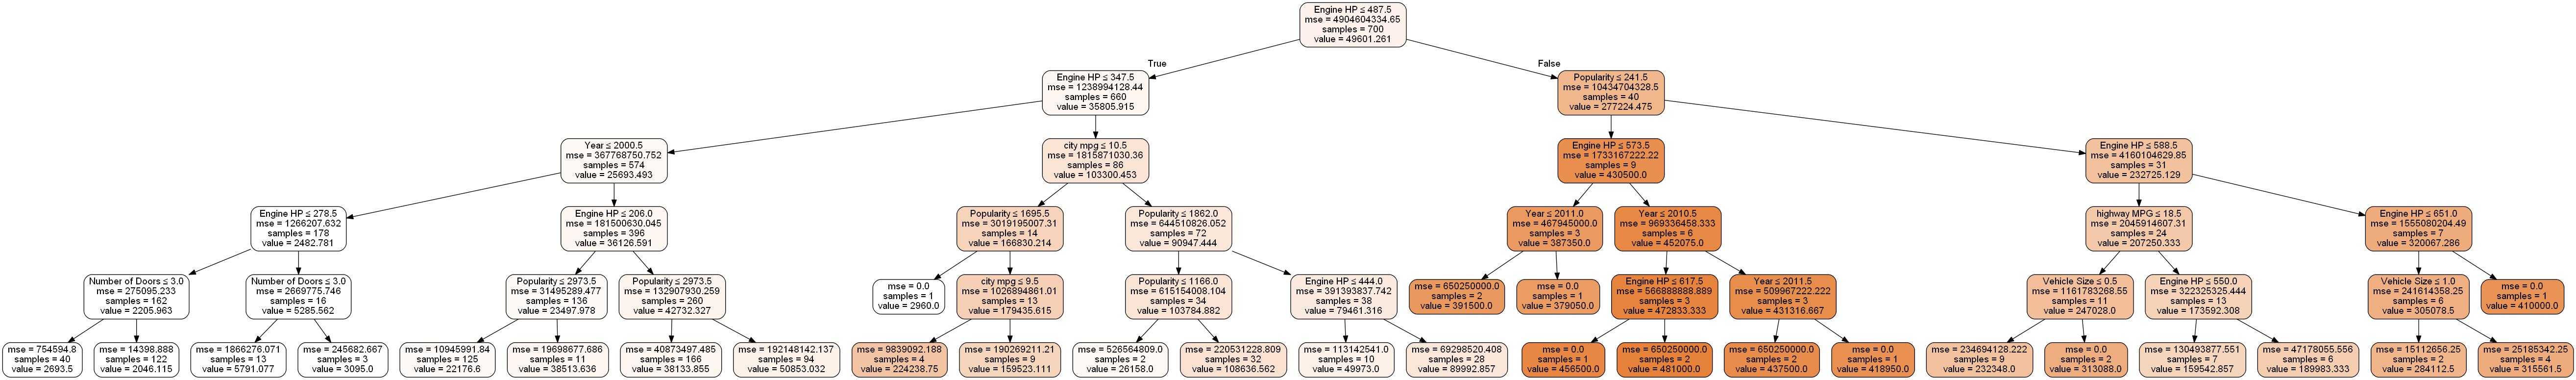

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_reg_model_4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

If you double click to zoom in, you can observe which features were used and now let's get the score

In [0]:
dt_reg_model_4.score(X_train, y_train)

0.9863790582471933

In [0]:
dt_reg_model_4.score(X_test, y_test)

0.96087754456932684

96% is extremely high score for any model and we got this after trying 3 previous models. However, we have to be careful about OVERFITTING which is discussed as a separate topic

First model with "Make" feature gave 87% accuracy for Test score<br>
Second model without "Make" feature gave same accuracy for Test score<br>
Third model which had many features gave 90% accuracy for Test score<br>
Fourth and Last model which also had many features and had max_depth of 5 gave astonishing 96% accuracy for Test score<br>
Conclusion: last model is the best so far and providing more fuatures and max_depth to the model result in a great Test score

# project 1

There is a data of Football players in fifa game and we need to predict potential of the young players

1)Split the data into Dependent(potential) and Independent variables which should at least be 6-7 features 

2)Check for missing data and if there is any column with empty value, normalize it

3)Normalize the data for Categorical type

3.0) Normalize Value and Wage by removing unnecessary signs (google and find solution, if you are not sure)

3.1)Split the Data into Traning and test sets

4)Create a Decision Tree model with max_depth=3 and fit the Train set

5)Visualize the Tree

6)Get the Train and Test scores

7)Create another 2 models by tuning the max_depth=4,5 and fit the Train set

8)Visualize the Tree for both of them

9)Get the Train and Test score for the both models

10) Compare all three models by Test score and decide which model is better and which feature is important

# Answers

In [0]:
fifa_dataset = pd.read_csv("fifa19_data.csv")
columns_needed = ['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'Skill Moves', 'Work Rate',]
fifa_dataset = fifa_dataset[columns_needed]
fifa_dataset.head()

,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,Skill Moves,Work Rate
0,L. Messi,31,94,94,FC Barcelona,€110.5M,€565K,Left,4.0,Medium/ Medium
1,Cristiano Ronaldo,33,94,94,Juventus,€77M,€405K,Right,5.0,High/ Low
2,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,High/ Medium
3,De Gea,27,91,93,Manchester United,€72M,€260K,Right,1.0,Medium/ Medium
4,K. De Bruyne,27,91,92,Manchester City,€102M,€355K,Right,4.0,High/ High


In [0]:
#Question 1
iv_columns = ['Age', 'Overall', 'Value', 'Wage', 'Preferred Foot', 'Work Rate', 'Skill Moves']
X = fifa_dataset.loc[:, iv_columns]
y = fifa_dataset.iloc[:, 3]

In [0]:
#Question 2
X.isnull().any()

Age               False
Overall           False
Value             False
Wage              False
Preferred Foot     True
Work Rate          True
Skill Moves        True
dtype: bool

In [0]:
X['Preferred Foot'].fillna("Right", inplace=True) #since most people are right handed

In [0]:
X['Work Rate'].fillna("Medium/ Medium", inplace=True)

In [0]:
X['Skill Moves'].fillna(X['Skill Moves'].mean(), inplace=True)

In [0]:
X.isnull().any() #None of them has any empty value

Age               False
Overall           False
Value             False
Wage              False
Preferred Foot    False
Work Rate         False
Skill Moves       False
dtype: bool

In [0]:
#Question 3
categories = ['Preferred Foot', 'Work Rate']

In [0]:
label_encoder = LabelEncoder();
for i in categories:
    X[i] = label_encoder.fit_transform(X[i])

In [0]:
#question 3.0
X['Value'] = X['Value'].str.replace('K', '') #removing 'K' sign from Value
X['Value'] = X['Value'].str.replace('€', '') #removing '€' sign from Value
X['Value'] = X['Value'].str.replace('M', '') #removing 'M' sign from Value
X['Wage'] = X['Wage'].str.replace('K', '') #removing 'K' sign from Wage
X['Wage'] = X['Wage'].str.replace('€', '') #removing '€' sign from Wage

In [ ]:
#getting rid of "K"=1000 and converting Values and wages in "K" into "M"
for number in enumerate(X['Value'].astype('str')):
  if number[1].find('K') != -1:
    noK = number[1].replace("K", '')
    X['Value'][number[0]] = float(noK)/1000
    
#Important

In [0]:
#Question 3.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
#Question 4.
answer_model_1 = DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=1)
answer_model_1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

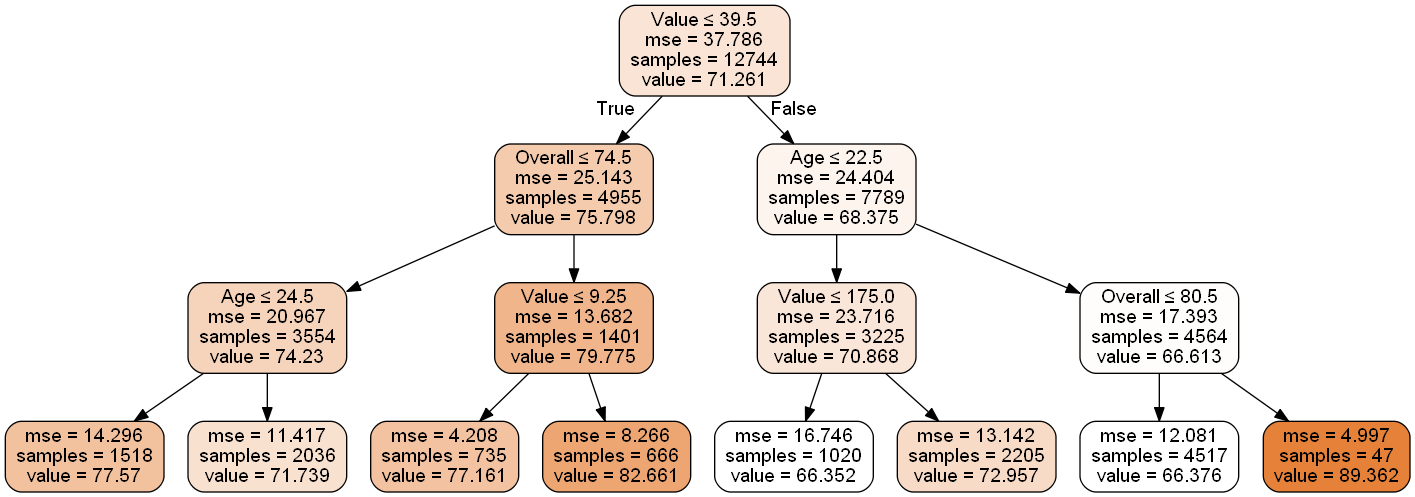

In [0]:
#Question5
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(answer_model_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
#Question6
answer_model_1.score(X_train, y_train)

0.67935049385520641

In [0]:
answer_model_1.score(X_test, y_test)

0.68713352107835168

In [0]:
#Question7
answer_model_2 = DecisionTreeRegressor(criterion='mse', max_depth=4, random_state=1)
answer_model_2.fit(X_train, y_train)
answer_model_3 = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=1)
answer_model_3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

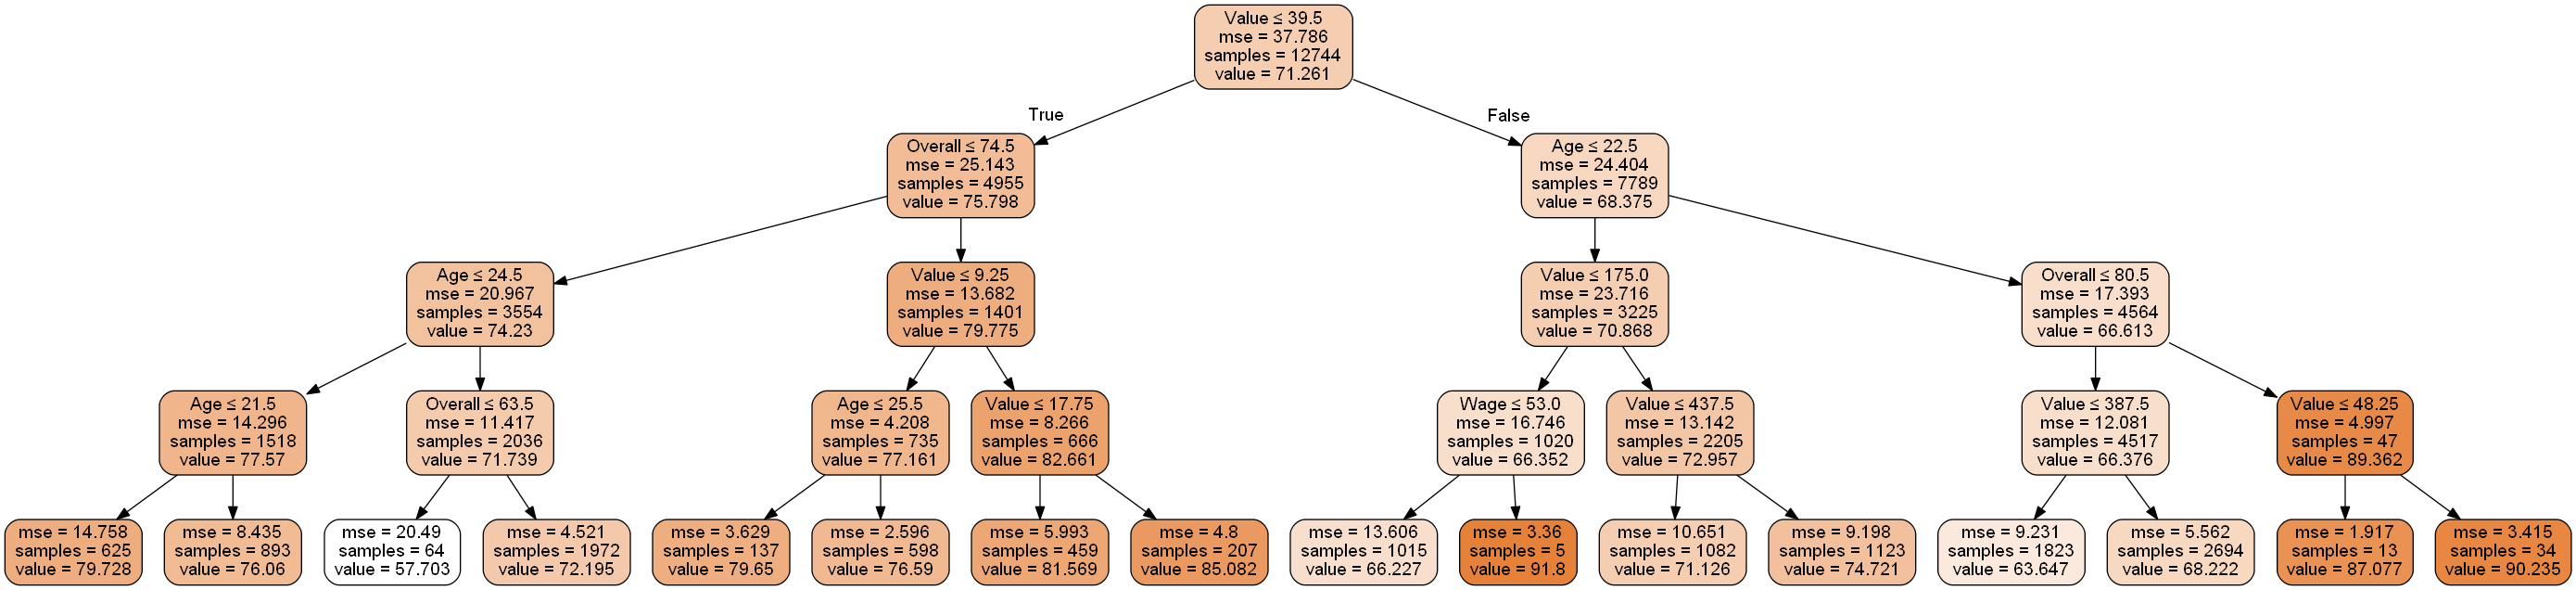

In [0]:
#Question8
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(answer_model_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
#Question9
answer_model_2.score(X_train, y_train)

0.79148296971256649

In [0]:
answer_model_2.score(X_test, y_test)

0.78065642406048508

In [0]:
answer_model_3.score(X_test, y_test)

0.84669131132350361

#Question10
Conclusion: According to the models created, best one so far is last model with max_depth=5